In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pytesseract

In [2]:
patient_medic_events = pd.read_csv("patient_medicine_events_at_QA_by_label.txt", sep='\t')

In [3]:
floors = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [4]:
patient_medic_events['label'] = patient_medic_events['label'].str.replace('Wards ','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace('Ward ','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace(' Unit','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace(' Centre','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace('Level ','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace(' Intensive Care','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace(' Day Case','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace('Maternity ','')
patient_medic_events['label'] = patient_medic_events['label'].str.replace('Renal Haemodialysis','Haemodialysis')
patient_medic_events.loc[patient_medic_events.label == 'Critical Care (E5)', 'label'] = 'E5'
patient_medic_events.loc[patient_medic_events.label == 'Renal', 'label'] = 'Renal Unit'
print(patient_medic_events)

    events floor                                label
0       82     A                               A5, A6
1      221     A                           Paediatric
2       10     A                            Discharge
3        2     A                            Reception
4      272     B               Haematology & Oncology
5      197     B                          B5, B6 & B7
6      113     B                                 (B8)
7      225     B                             Neonatal
8       58     B                                  Eye
9      859     C                        Acute Medical
10     634     C                          C5, C6 & C7
11      16     C                        C Outpatients
12      60     C                           Cardiology
13       8     C           Diabetes and Endocrinology
14     707     C                 Emergency Department
15     994     C                             Pharmacy
16       3     C                            Radiology
17     145     C            

In [5]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text_dict = {}
for floor in floors:
    text = pytesseract.image_to_data(Image.open('level_maps_'+floor.lower()+'.png'),output_type='data.frame')
    text = text.dropna()
    text = text[text.text != ' ']
    text = text[text.text != '  ']
    text = text[text.text != '   ']
    text = text[text.text != '    ']
    text = text[text.text != '     ']
    text_dict[floor] = text
print(text_dict)

{'A':      level  page_num  block_num  par_num  line_num  word_num  left  top  \
4        5         1          1        1         1         1    58   44   
5        5         1          1        1         1         2   138   44   
6        5         1          1        1         1         3   301   44   
7        5         1          1        1         1         4   465   44   
8        5         1          1        1         1         5   538   54   
9        5         1          1        1         1         6   654   44   
10       5         1          1        1         1         7   764   44   
11       5         1          1        1         1         8   848   45   
13       5         1          1        1         2         1    59   94   
14       5         1          1        1         2         2   207   95   
15       5         1          1        1         2         3   288   93   
16       5         1          1        1         2         4   364   96   
17       5         

In [6]:
text_dict['A'].loc[text_dict['A'].text == 'A6', 'text'] = 'A5, A6'
text_dict['A']['text'] = text_dict['A']['text'].str.replace('Dischage','Discharge')
text_dict['B'].loc[text_dict['B'].text == 'Centre', 'text'] = 'Haematology & Oncology'
text_dict['B'].loc[text_dict['B'].text == 'B6', 'text'] = 'B5, B6 & B7'
text_dict['B'].loc[text_dict['B'].text == 'Eye', 'left'] = 1100
text_dict['C'].loc[text_dict['C'].text == 'Day', 'text'] = 'Acute Medical'
text_dict['C'].loc[text_dict['C'].text == 'Acute Medical', 'top'] = 354
text_dict['C'].loc[text_dict['C'].text == 'Ambulance', 'left'] = 700
text_dict['C'].loc[text_dict['C'].text == 'C6', 'text'] = 'C5, C6 & C7'
text_dict['C'].loc[text_dict['C'].text == 'Ambulance', 'text'] = 'C Outpatients'
text_dict['C'].loc[text_dict['C'].text == 'C Outpatients', 'left'] = 50
text_dict['C'].loc[text_dict['C'].text == 'Diabetes', 'text'] = 'Diabetes and Endocrinology'
text_dict['C'].loc[text_dict['C'].text == 'Blood', 'text'] = 'Emergency Department'
text_dict['C'].loc[text_dict['C'].text == 'Emergency Department', 'left'] = 1100
text_dict['C'].loc[text_dict['C'].text == 'Radiolo', 'text'] = 'Radiology'
text_dict['C'].loc[text_dict['C'].text == 'Rheumatology', 'text'] = 'Rheumatology Outpatients'
text_dict['D'].loc[text_dict['D'].text == 'D3', 'text'] = 'D1, D2, D3 & D4'
text_dict['D'].loc[text_dict['D'].text == 'Day', 'text'] = 'Day Surgery'
text_dict['D'].loc[text_dict['D'].text == 'Level', 'text'] = 'D Outpatients'
text_dict['D'].loc[text_dict['D'].text == 'Gynaecology', 'text'] = 'Gynaecology Outpatients'
text_dict['D'].loc[text_dict['D'].text == 'Neurophysiology', 'text'] = 'Neurophysiology Urology Outpatients'
text_dict['E'].loc[text_dict['E'].text == 'E5)', 'text'] = 'E5'
text_dict['E'].loc[text_dict['E'].text == 'E3', 'text'] = 'E1, E2, E3 & E4'
text_dict['E'].loc[text_dict['E'].text == 'E7', 'text'] = 'E6, E7 & E8'
text_dict['E'].loc[text_dict['E'].text == 'Theatre', 'text'] = 'Theatre Admissions'
text_dict['F'].loc[text_dict['F'].text == 'F6', 'text'] = 'F5, F6 & F7'
text_dict['F'].loc[text_dict['F'].text == 'F3', 'text'] = 'F1, F2, F3 & F4'
text_dict['F'].loc[text_dict['F'].text == 'Medical', 'text'] = 'Medical Physics'
text_dict['G'].loc[text_dict['G'].text == 'Unit', 'text'] = 'Renal Unit'
text_dict['G'].loc[text_dict['G'].text == 'G8,', 'text'] = 'G5'
text_dict['G'].loc[text_dict['G'].text == 'G5', 'top'] = 750
text_dict['G'].loc[text_dict['G'].text == 'G5', 'left'] = 700
text_dict['G'].loc[text_dict['G'].text == 'G2,', 'text'] = 'G1, G2, G3 & G4'
text_dict['G'].loc[text_dict['G'].text == 'G7', 'text'] = 'G8, G7 & G6'
text_dict['G'].loc[text_dict['G'].text == 'G10', 'text'] = 'G10 & G9'
text_dict['G'].loc[text_dict['G'].text == 'Outpatients', 'text'] = 'Renal Outpatients'

In [7]:
merged_dict = {}
for floor in floors:
    merged_dict[floor] = pd.merge(left=patient_medic_events,right=text_dict[floor],left_on='label',right_on='text')
print(merged_dict)

{'A':    events floor       label  level  page_num  block_num  par_num  line_num  \
0      82     A      A5, A6      5         1         21        1         2   
1     221     A  Paediatric      5         1         18        1         1   
2      10     A   Discharge      5         1         17        1         1   
3       2     A   Reception      5         1         10        2         2   

   word_num  left  top  width  height  conf        text  
0         2   830  823     30      20    92      A5, A6  
1         1   316  705    113      27    96  Paediatric  
2         1   772  706    102      28    92   Discharge  
3         1   102  554    127      41    96   Reception  , 'B':    events floor                   label  level  page_num  block_num  par_num  \
0     272     B  Haematology & Oncology      5         1          5        1   
1     197     B             B5, B6 & B7      5         1          9        1   
2     113     B                    (B8)      5         1          9

In [8]:
cm = plt.cm.get_cmap('RdYlGn_r')
vmin = patient_medic_events['events'].min()
vmax = patient_medic_events['events'].max()
area_multiplication = 6

<Figure size 432x288 with 0 Axes>

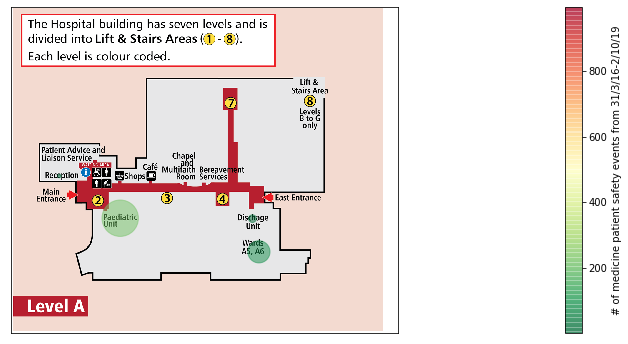

<Figure size 432x288 with 0 Axes>

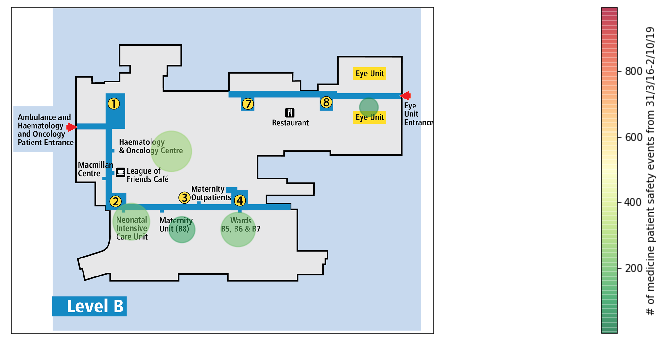

<Figure size 432x288 with 0 Axes>

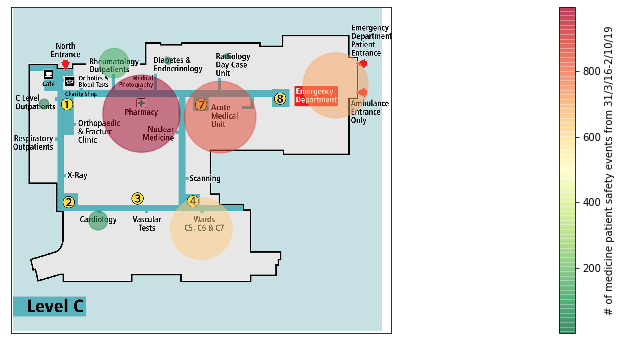

<Figure size 432x288 with 0 Axes>

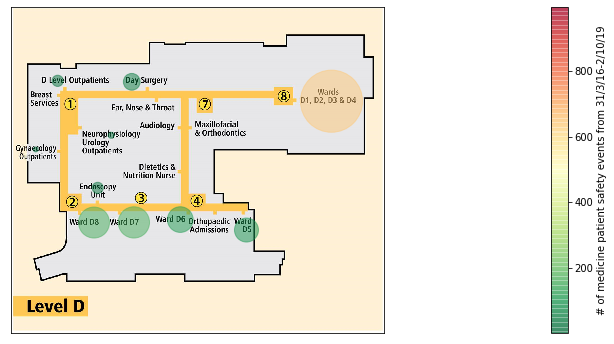

<Figure size 432x288 with 0 Axes>

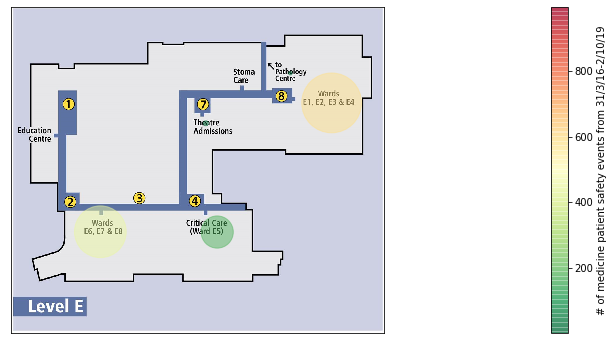

<Figure size 432x288 with 0 Axes>

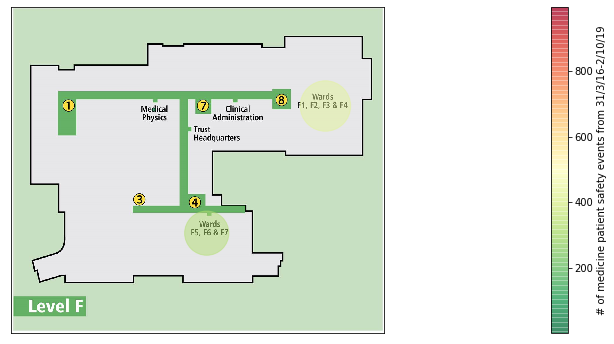

<Figure size 432x288 with 0 Axes>

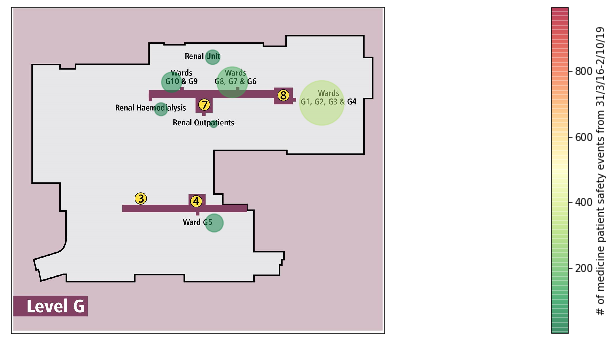

In [9]:
for floor in floors:
    plt.figure()
    img=mpimg.imread('level_maps_'+floor.lower()+'.png')
    plt.figure(figsize=(60,6))
    imgplot = plt.imshow(img)
    fig = plt.gca()
    x = merged_dict[floor].left.values + merged_dict[floor].width.values/2
    y = merged_dict[floor].top.values + merged_dict[floor].height.values/2
    size = merged_dict[floor].events.values*area_multiplication
    color = merged_dict[floor].events.values
    plt.scatter(x,y,s=size,c=color,vmin=vmin,vmax=vmax,cmap=cm,alpha=0.5)
    plt.colorbar(label='# of medicine patient safety events from 31/3/16-2/10/19')
    fig.get_xaxis().set_visible(False)
    fig.get_yaxis().set_visible(False)
    plt.savefig('floor_'+floor.lower()+'_by_label.png')